# Proyek Analisis Data: Air Quality
- **Nama:** Icha Aulia Putri Ambarwati
- **Email:** ichaaulia720@gmail.com
- **ID Dicoding:** icha_aulia

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren polusi udara dari waktu ke waktu?
- Stasiun mana yang mencatat tingkat polusi udara tertinggi dan terendah?
- Apakah ada hubungan antara suhu, udara, dan kelembapan dengan tingkat polusi udara?
- Bagaimana pola hujan mempengaruhi tingkat polusi udara?
- Apakah ada lonjakan polusi yang signifikan pada waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [35]:
folder_path = './PRSA_Data_20130301-20170228/'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    station_name = file.split('_')[2]  # Ambil nama stasiun dari nama file
    df['station'] = station_name
    all_data.append(df)

combined_data = pd.concat(all_data, ignore_index=True)

**Insight:**
- Menggabungkan semua data 12 station menjadi satu

### Assessing Data

In [36]:
print(combined_data.info())
print(combined_data.describe())
print(combined_data.isnull().sum())
duplicates = combined_data.duplicated().sum()
print(f'Jumlah data duplikat: {duplicates}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None
                  No           year     

**Insight:**
- Tipe Data = Year, Month, Day
- Missing Value = PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, WSPM.
- Duplicate = 0
- Inaccurate Value = Terdeteksi Outlier pada PM2.5, PM10, SO2, CO, O3 dan RAIN

### Cleaning Data

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
3   2013-03-01 03:00:00
4   2013-03-01 04:00:00
Name: datetime, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-

C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_data.interpolate(method='time', inplace=True)


No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64
DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768,

C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['wd'].fillna(method='ffill', inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['wd'].fillna(method='ffill', inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:25: FutureWarning: A value is trying 

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       11.500000      79.844573     104.866382      15.883456   
std         6.922195      81.002734      92.531241      21.754781   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['SO2'].replace(500, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

[ 47.          50.          54.          72.          84.
  87.          73.          80.          98.          88.
  79.          64.          67.          83.         123.
 135.         116.          89.          77.          51.
  46.          66.          75.          58.          76.
  91.          94.          82.         101.         114.
 107.         109.         104.          85.          97.
 103.         106.          93.          92.         147.
 133.         131.          90.          83.6808     102.
 119.         124.         126.         130.         140.
 154.         145.         142.         117.         111.
  86.          57.          78.         182.         166.
 169.          62.          99.         128.          71.
 144.         125.9496      49.          68.          55.
  48.          53.          52.          70.         108.
 122.          56.          96.         148.         161.
  61.          65.         112.         113.          74.
 118.         

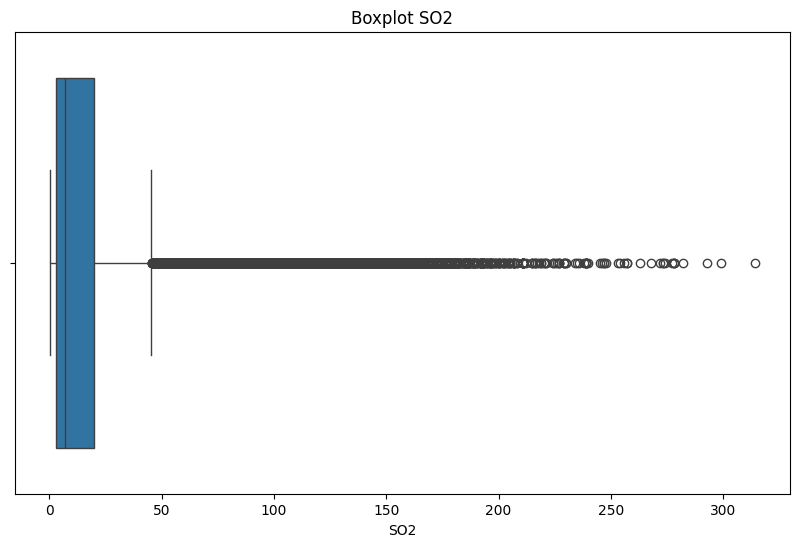

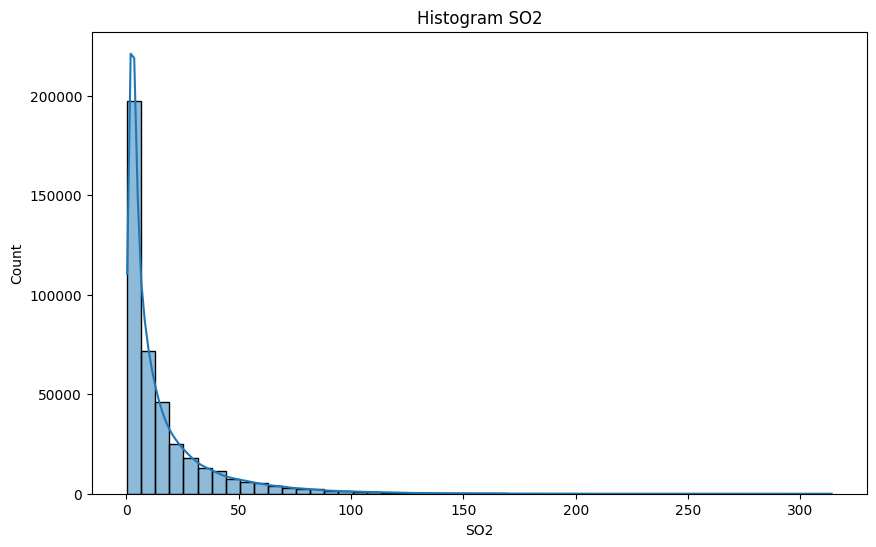

count    420768.000000
mean         13.516217
std          14.053026
min           0.285600
25%           3.000000
50%           7.000000
75%          20.000000
max          45.500000
Name: SO2, dtype: float64
count    420768.000000
mean       1233.454288
std        1166.042001
min         100.000000
25%         500.000000
50%         900.000000
75%        1500.000000
max       10000.000000
Name: CO, dtype: float64
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:81: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['CO'].replace(1000, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

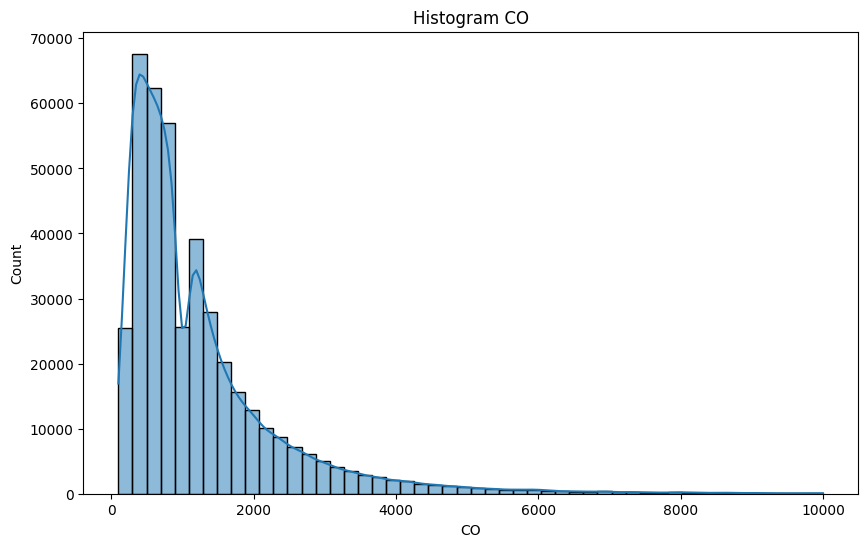

count    420768.000000
mean       1130.061138
std         829.665768
min         100.000000
25%         500.000000
50%         800.000000
75%        1500.000000
max        3000.000000
Name: CO, dtype: float64
count    420768.000000
mean         57.023507
std          56.613598
min           0.214200
25%          10.000000
50%          44.000000
75%          82.000000
max        1071.000000
Name: O3, dtype: float64


C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['O3'].replace(1071, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

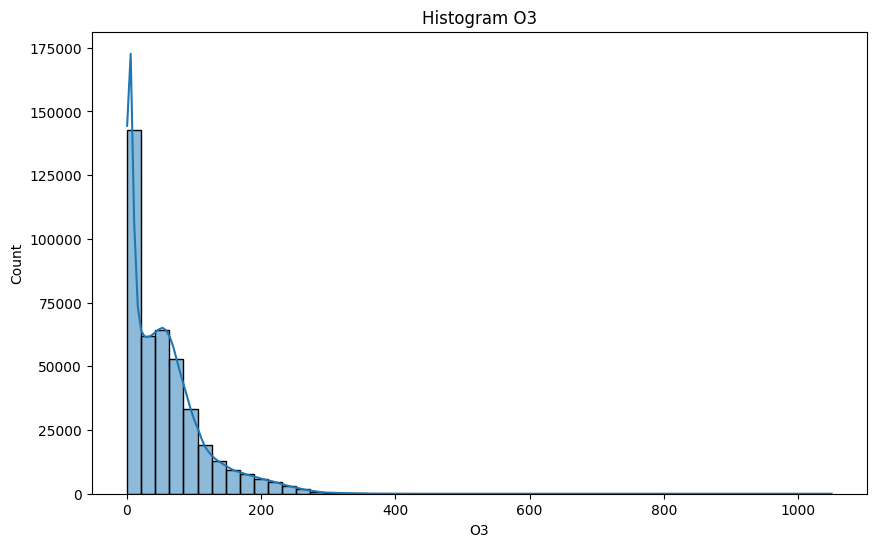

count    420768.000000
mean         55.459362
std          51.543483
min           0.214200
25%          10.000000
50%          44.000000
75%          82.000000
max         190.000000
Name: O3, dtype: float64
count    420768.000000
mean          0.064417
std           0.820626
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.500000
Name: RAIN, dtype: float64


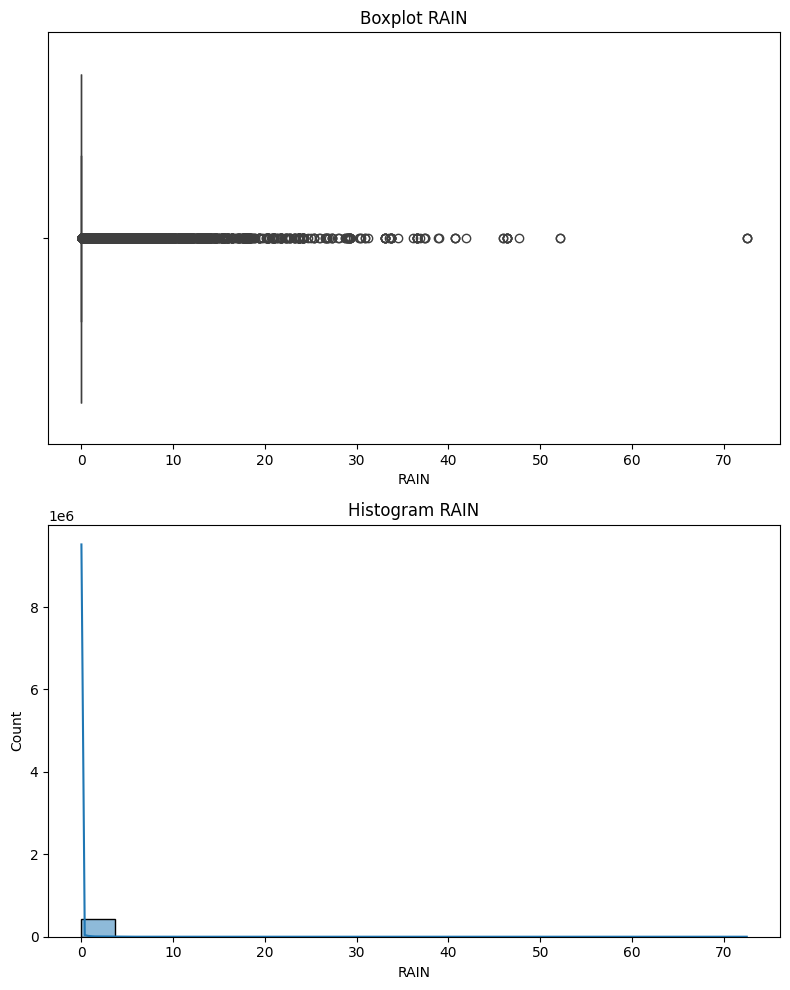

                     RAIN        station
datetime                                
2013-08-11 15:00:00  72.5   Aotizhongxin
2013-08-11 15:00:00  13.2      Changping
2013-08-11 15:00:00  13.2       Dingling
2013-08-11 15:00:00   0.3         Dongsi
2013-08-11 15:00:00  72.5       Guanyuan
2013-08-11 15:00:00  34.5        Gucheng
2013-08-11 15:00:00   3.6        Huairou
2013-08-11 15:00:00   0.3   Nongzhanguan
2013-08-11 15:00:00   7.1         Shunyi
2013-08-11 15:00:00   0.3        Tiantan
2013-08-11 15:00:00  72.5         Wanliu
2013-08-11 15:00:00  10.1  Wanshouxigong

Statistik deskriptif untuk station: Aotizhongxin
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.00000

C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:155: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['RAIN'].replace(72.5, np.nan, inplace=True)
C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\2476001923.py:156: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      66.405369     84.364705     10.939889     28.039148    896.592312   
std       72.882595     80.846461     12.271700    

In [37]:

combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']], errors='coerce')
print(combined_data['datetime'].head())
print(combined_data.info())
print(combined_data.describe())
combined_data.head()
print(combined_data.columns)
combined_data.set_index('datetime', inplace=True)
print(combined_data.columns)
print(combined_data.info())
combined_data.head()
combined_data.interpolate(method='time', inplace=True)
print(combined_data.isnull().sum())
combined_data[combined_data['wd'].isnull()]
combined_data.wd.value_counts()
print(combined_data.index)
combined_data.loc['2013-11-22']
combined_data.loc['2014-07-02']
combined_data['wd'].fillna(method='ffill', inplace=True)
print(combined_data.isnull().sum())
combined_data.loc['2013-11-22']
print(f"Jumlah nilai 999 di PM2.5: {(combined_data['PM2.5'] == 999).sum()}")
print(f"Jumlah nilai 999 di PM10: {(combined_data['PM10'] == 999).sum()}")
combined_data[combined_data['PM2.5'] == combined_data['PM2.5'].max()]
combined_data[combined_data['PM10'] == combined_data['PM10'].max()]
combined_data['PM2.5'].replace(999, np.nan, inplace=True)
combined_data['PM2.5'].interpolate(method='time', inplace=True)
combined_data.loc['2016-02-08 02:00:00']
combined_data['PM10'].replace(999, np.nan, inplace=True)
combined_data['PM10'].interpolate(method='time', inplace=True)
combined_data.loc['2014-01-23 15:00:00']
combined_data.loc['2013-10-29 11:00:00']
print(combined_data.describe())
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
print(combined_data.describe())
combined_data['SO2'].replace(500, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
combined_data['SO2'].replace(411, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
combined_data['SO2'].replace(341, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
combined_data['SO2'].replace(315, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
combined_data['SO2'].replace(310, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
combined_data['SO2'].replace(300, np.nan, inplace=True)
combined_data['SO2'].interpolate(method='time', inplace=True)
combined_data[combined_data['SO2'] == combined_data['SO2'].max()]
Q1 = combined_data['SO2'].quantile(0.25)
Q3 = combined_data['SO2'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek nilai yang di luar batas
outliers = combined_data[(combined_data['SO2'] < lower_bound) | (combined_data['SO2'] > upper_bound)]
print(outliers['SO2'].unique())  # Lihat nilai-nilai outlier
print(f"Jumlah outlier: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['SO2'])
plt.title('Boxplot SO2')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['SO2'], bins=50, kde=True)
plt.title('Histogram SO2')
plt.show()

combined_data['SO2'] = combined_data['SO2'].mask(combined_data['SO2'] > upper_bound, upper_bound)
combined_data['SO2'] = combined_data['SO2'].mask(combined_data['SO2'] < lower_bound, lower_bound)
print(combined_data['SO2'].describe())
print(combined_data['CO'].describe())
combined_data[combined_data['CO'] == combined_data['CO'].max()]
combined_data['CO'].replace(1000, np.nan, inplace=True)
combined_data['CO'].interpolate(method='time', inplace=True)
combined_data[combined_data['CO'] == combined_data['CO'].max()]
print(combined_data.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['CO'], bins=50, kde=True)
plt.title('Histogram CO')
plt.show()

Q1_CO = combined_data['CO'].quantile(0.25)
Q3_CO = combined_data['CO'].quantile(0.75)
IQR_CO = Q3_CO - Q1_CO

# Batas bawah dan atas untuk deteksi outlier
lower_bound_CO = Q1_CO - 1.5 * IQR_CO
upper_bound_CO = Q3_CO + 1.5 * IQR_CO

combined_data['CO'] = combined_data['CO'].mask(combined_data['CO'] > upper_bound_CO, upper_bound_CO)
combined_data['CO'] = combined_data['CO'].mask(combined_data['CO'] < lower_bound_CO, lower_bound_CO)
print(combined_data['CO'].describe())
print(combined_data['O3'].describe())
combined_data[combined_data['O3'] == combined_data['O3'].max()]
combined_data['O3'].replace(1071, np.nan, inplace=True)
combined_data['O3'].interpolate(method='time', inplace=True)
combined_data[combined_data['O3'] == combined_data['O3'].max()]

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['O3'], bins=50, kde=True)
plt.title('Histogram O3')
plt.show()

Q1_O3 = combined_data['O3'].quantile(0.25)
Q3_O3 = combined_data['O3'].quantile(0.75)
IQR_O3 = Q3_O3 - Q1_O3

# Batas bawah dan atas untuk deteksi outlier
lower_bound_O3 = Q1_O3 - 1.5 * IQR_O3
upper_bound_O3 = Q3_O3 + 1.5 * IQR_O3

combined_data['O3'] = combined_data['O3'].mask(combined_data['O3'] > upper_bound_O3, upper_bound_O3)
combined_data['O3'] = combined_data['O3'].mask(combined_data['O3'] < lower_bound_O3, lower_bound_O3)
print(combined_data['O3'].describe())
print(combined_data['RAIN'].describe())
combined_data[combined_data['RAIN'] == combined_data['RAIN'].max()]
combined_data[combined_data['RAIN'] > 50]
combined_data[combined_data['RAIN'] > 30]

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
sns.boxplot(x=combined_data['RAIN'])
plt.title("Boxplot RAIN")
plt.xlabel("RAIN")

plt.subplot(2, 1, 2)
sns.histplot(combined_data['RAIN'], kde=True)
plt.title("Histogram RAIN")
plt.xlabel("RAIN")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Q1 = combined_data['RAIN'].quantile(0.25)
Q3 = combined_data['RAIN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_data[(combined_data['RAIN'] < lower_bound) | (combined_data['RAIN'] > upper_bound)]
print(outliers.loc['2013-08-11 15:00:00', ['RAIN', 'station']])
combined_data[combined_data['RAIN'] == 72.5]
combined_data.loc['2013-08-11', 'RAIN'].describe()
combined_data['RAIN'].replace(72.5, np.nan, inplace=True)
combined_data['RAIN'].interpolate(method='time', inplace=True)
combined_data.loc['2013-08-11', 'RAIN'].describe()

stations = combined_data['station'].unique()
for station in stations:
    print(f"\nStatistik deskriptif untuk station: {station}")
    print(combined_data[combined_data['station'] == station].describe())

print(combined_data.info())
print(combined_data.describe())
print(combined_data.isnull().sum())
duplicates = combined_data.duplicated().sum()
print(f'Jumlah data duplikat: {duplicates}')

**Insight:**
- Ditambahkan datetime sebagai gabungan dari Year, Month, Day & Hour
- Menggunakan metode Interpolation untuk menangani missing value
- Dilakukan metode Imputation pada Outlier.

## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
import pandas as pd

# Membaca data dan mengatur index
combined_data = pd.read_csv('./dashboard/cleaned_combined_data.csv')
combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']])
combined_data.set_index('datetime', inplace=True)

# Data harian
daily_data = combined_data.resample('W').mean(numeric_only=True)
display(daily_data)

# Data bulanan
monthly_data = combined_data.resample('M').mean(numeric_only=True)
display(monthly_data)

# Matriks korelasi
correlation_matrix = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()
display(correlation_matrix)

# Korelasi antara polutan dan suhu
temp_correlation = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']].corr()['TEMP']
display(temp_correlation)

# Rata-rata polutan per stasiun
station_grouped = combined_data.groupby('station').mean(numeric_only=True)
display(station_grouped)

# Polutan tertinggi dan terendah per stasiun
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    max_station = station_grouped[pollutant].idxmax()
    min_station = station_grouped[pollutant].idxmin()
    print(f'{pollutant}:')
    print(f'  Highest: {max_station} with value {station_grouped.loc[max_station, pollutant]}')
    print(f'  Lowest: {min_station} with value {station_grouped.loc[min_station, pollutant]}')

# Rata-rata polutan berdasarkan hujan
rain_grouped = combined_data.groupby('RAIN').mean(numeric_only=True)
display(rain_grouped)

# Rata-rata polutan berdasarkan jam
combined_data['hour'] = combined_data.index.hour
hour_grouped = combined_data.groupby('hour').mean(numeric_only=True)
display(hour_grouped)

# Statistik PM2.5 berdasarkan jam
pm25_hour_stats = combined_data.groupby(by="hour").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})
display(pm25_hour_stats)

# Distribusi dan statistik deskriptif
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']:
    print(f'Distribution of {column}:')
    display(combined_data[column].describe())

# Pairplot data
pairplot_data = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
display(pairplot_data)

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']:
    outliers = find_outliers(combined_data[column])
    print(f'Outliers in {column}: {len(outliers)}')

Q1 = combined_data['PM2.5'].quantile(0.25)
Q3 = combined_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_pollution = combined_data[combined_data['PM2.5'] > upper_bound]
extreme_times = extreme_pollution.groupby('station')['PM2.5'].idxmax()
print('Waktu dengan PM2.5 tertinggi per station:')
print(extreme_times)

combined_data.sort_index(inplace=True)
extreme_weather = combined_data.loc['2017-02-14':'2017-02-16']
weather_summary = extreme_weather.groupby('datetime')[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()
print('Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:')
print(weather_summary)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,,,,,,
2013-03-03,36.5,2013.0,3.000000,2.000000,11.5,39.364583,54.615741,24.093097,51.321547,1043.090278,41.431852,2.230556,1022.445949,-16.248611,0.000000,1.842014
2013-03-10,156.5,2013.0,3.000000,7.000000,11.5,127.883598,177.570767,33.199229,88.065382,1706.815146,71.200893,7.921974,1008.608036,-7.972123,0.000000,1.878720
2013-03-17,324.5,2013.0,3.000000,14.000000,11.5,155.800595,165.727513,34.822421,83.378307,1759.480324,72.194444,6.276538,1013.946478,-3.122867,0.021280,1.480060
2013-03-24,492.5,2013.0,3.000000,21.000000,11.5,61.516369,77.979167,15.407738,46.151290,855.157242,48.464188,4.453819,1009.503224,-6.526091,0.083978,2.288740
2013-03-31,660.5,2013.0,3.000000,28.000000,11.5,101.735780,129.413773,26.111879,59.361880,1294.025628,39.357563,6.928819,1012.459077,-5.007341,0.000000,1.917163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-05,34428.5,2017.0,1.714286,10.857143,11.5,89.780754,101.431382,22.541336,49.350860,1211.177249,48.702216,0.195096,1022.419610,-18.494494,0.000000,1.645238
2017-02-12,34596.5,2017.0,2.000000,9.000000,11.5,40.539187,58.872024,12.759673,37.041667,838.756614,55.381448,0.320208,1023.740451,-17.110516,0.000000,2.424157
2017-02-19,34764.5,2017.0,2.000000,16.000000,11.5,114.392857,134.893188,22.793403,69.128638,1631.167328,38.699570,2.806101,1018.187401,-11.661756,0.000000,1.999157


C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\3929241385.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = combined_data.resample('M').mean(numeric_only=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,,,,,,
2013-03-31,372.5,2013.0,3.0,16.0,11.5,104.730585,129.635025,27.066715,67.505247,1368.955458,56.219845,5.992249,1012.224373,-6.682090,0.023768,1.886414
2013-04-30,1104.5,2013.0,4.0,15.5,11.5,62.225849,95.818866,18.191765,46.050683,890.339969,61.441653,12.380058,1007.811817,-3.203681,0.014294,2.333310
2013-05-31,1836.5,2013.0,5.0,16.0,11.5,81.597857,131.061417,22.057508,50.593784,984.585424,82.371096,21.676691,1002.652912,8.131384,0.005791,1.811694
2013-06-30,2568.5,2013.0,6.0,15.5,11.5,102.098052,115.807350,12.878148,48.190581,1364.525656,71.219859,23.583426,999.639838,17.439853,0.126528,1.287350
2013-07-31,3300.5,2013.0,7.0,16.0,11.5,67.694407,76.149268,7.336935,39.241467,942.227823,75.630528,27.108826,995.501680,20.902184,0.275448,1.316913
2013-08-31,4044.5,2013.0,8.0,16.0,11.5,60.871826,77.583333,6.837140,39.373440,859.722222,76.275878,26.903775,998.769948,20.016719,0.085372,1.383292
2013-09-30,4776.5,2013.0,9.0,15.5,11.5,76.252469,96.416590,9.961923,51.752245,1156.971566,47.529918,20.240683,1008.849711,14.360961,0.091204,1.171447
2013-10-31,5508.5,2013.0,10.0,16.0,11.5,91.700231,112.539539,13.842968,63.434577,1182.855436,27.907996,12.984017,1015.799754,5.070105,0.013934,1.258210
2013-11-30,6240.5,2013.0,11.0,15.5,11.5,73.834838,96.266975,18.860615,55.948615,1256.693673,24.113065,5.963900,1016.536910,-7.492697,0.000093,1.821146


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP
PM2.5,1.000000,0.878440,0.476804,0.665016,0.765669,-0.172529,-0.131433,0.019730,0.113995
PM10,0.878440,1.000000,0.462166,0.643519,0.669534,-0.131315,-0.095420,-0.018240,0.068475
SO2,0.476804,0.462166,1.000000,0.523808,0.603284,-0.186782,-0.360871,0.259744,-0.308311
NO2,0.665016,0.643519,0.523808,1.000000,0.714573,-0.497245,-0.277898,0.173886,-0.031177
CO,0.765669,0.669534,0.603284,0.714573,1.000000,-0.363434,-0.315515,0.178767,-0.020797
O3,-0.172529,-0.131315,-0.186782,-0.497245,-0.363434,1.000000,0.608207,-0.455056,0.311562
TEMP,-0.131433,-0.095420,-0.360871,-0.277898,-0.315515,0.608207,1.000000,-0.813382,0.820253
PRES,0.019730,-0.018240,0.259744,0.173886,0.178767,-0.455056,-0.813382,1.000000,-0.750373
DEWP,0.113995,0.068475,-0.308311,-0.031177,-0.020797,0.311562,0.820253,-0.750373,1.000000


PM2.5   -0.131433
PM10    -0.095420
SO2     -0.360871
NO2     -0.277898
CO      -0.315515
O3       0.608207
TEMP     1.000000
Name: TEMP, dtype: float64

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,,,,,,
Aotizhongxin,17532.5,2014.66256,6.52293,15.729637,11.5,82.525774,110.059006,14.689492,59.195207,1146.898543,53.732623,13.581281,1011.850414,3.119785,0.065323,1.708561
Changping,17532.5,2014.66256,6.52293,15.729637,11.5,71.652725,95.158182,12.776116,44.267046,1074.493455,56.425880,13.671390,1007.776903,1.488634,0.060287,1.854363
Dingling,17532.5,2014.66256,6.52293,15.729637,11.5,66.366440,84.268800,10.939598,28.084898,896.496335,66.642885,13.671390,1007.776903,1.488634,0.060287,1.854363
Dongsi,17532.5,2014.66256,6.52293,15.729637,11.5,86.094058,110.286935,15.629900,53.812940,1204.734386,55.969336,13.668113,1012.550514,2.444643,0.063983,1.860789
Guanyuan,17532.5,2014.66256,6.52293,15.729637,11.5,82.915530,109.049250,14.618021,57.824356,1161.691436,53.550133,13.581281,1011.850414,3.119785,0.065323,1.708561
Gucheng,17532.5,2014.66256,6.52293,15.729637,11.5,84.058854,119.009092,13.335220,55.809865,1201.292280,55.964912,13.855403,1008.840614,2.600039,0.064377,1.344473
Huairou,17532.5,2014.66256,6.52293,15.729637,11.5,69.680306,92.068135,10.687217,33.044194,993.063897,58.196008,12.432473,1007.618686,2.219603,0.067833,1.653111
Nongzhanguan,17532.5,2014.66256,6.52293,15.729637,11.5,84.801476,109.155245,15.378141,57.963464,1189.876355,56.658880,13.668113,1012.550514,2.444643,0.063983,1.860789
Shunyi,17532.5,2014.66256,6.52293,15.729637,11.5,79.332588,99.028776,11.780529,44.157006,1089.212283,53.719257,13.375827,1013.068520,2.451168,0.061006,1.808128


PM2.5:
  Highest: Dongsi with value 86.09405800821355
  Lowest: Dingling with value 66.36643993839836
PM10:
  Highest: Gucheng with value 119.00909194615559
  Lowest: Dingling with value 84.26879990873832
SO2:
  Highest: Dongsi with value 15.629900433493042
  Lowest: Huairou with value 10.687216586812685
NO2:
  Highest: Wanliu with value 64.69575934006389
  Lowest: Dingling with value 28.084898037873604
CO:
  Highest: Wanshouxigong with value 1234.126326146475
  Lowest: Dingling with value 896.4963352726443
O3:
  Highest: Dingling with value 66.64288470225873
  Lowest: Wanliu with value 46.370803775952545


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
RAIN,,,,,,,,,,,,,,,
0.0,17519.428405,2014.663764,6.490043,15.741851,11.505573,80.550655,106.228742,13.852019,51.168850,1132.428909,55.659516,13.429149,1010.921555,2.005541,1.737985
0.1,17271.932844,2014.555695,7.459259,15.495971,10.881984,66.037751,72.188557,5.930958,40.486319,1106.368374,44.740441,15.922073,1007.333856,13.479656,1.348066
0.2,18105.986964,2014.654536,7.404671,15.771320,11.216187,66.095763,74.155115,5.887087,41.785648,1140.635705,43.406485,15.101616,1007.933379,12.828191,1.412167
0.3,18362.269120,2014.669553,7.560606,16.159452,10.948773,65.976190,71.046657,5.693487,39.317257,1139.100048,45.064857,14.438276,1008.941811,12.443266,1.499711
0.4,17989.110254,2014.644983,7.320838,16.869901,11.237045,66.620250,72.436751,6.307245,40.970270,1134.391768,40.956964,13.756808,1009.085226,11.951929,1.473760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.9,22025.000000,2015.000000,9.000000,4.000000,16.000000,20.000000,20.000000,2.000000,26.000000,1500.000000,83.000000,20.400000,1003.300000,19.400000,1.100000
45.9,7294.000000,2013.500000,6.500000,14.500000,21.000000,174.000000,246.500000,5.500000,18.500000,1800.000000,113.000000,20.250000,995.150000,20.000000,1.500000
46.4,30964.000000,2016.000000,9.000000,11.000000,3.000000,77.000000,77.000000,3.000000,34.000000,894.444444,63.833333,19.700000,1008.300000,18.900000,3.400000


,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,87.693449,115.044434,12.916720,58.000662,1229.321522,41.457830,11.281395,1011.172350,3.138098,0.068138,1.357835
1,17522.0,2014.66256,6.52293,15.729637,86.858302,111.994638,12.562317,55.797189,1227.180196,37.763278,10.816466,1011.110648,3.172591,0.052647,1.321886
2,17523.0,2014.66256,6.52293,15.729637,84.759157,107.486644,12.642443,53.327890,1184.663708,33.870645,10.364676,1011.061288,3.114414,0.066159,1.282873
3,17524.0,2014.66256,6.52293,15.729637,82.159152,102.372983,11.710992,52.308663,1151.504530,31.868830,9.965999,1010.994018,3.025795,0.093401,1.256942
4,17525.0,2014.66256,6.52293,15.729637,79.353785,97.722063,11.383256,51.822475,1123.057914,30.379428,9.639834,1010.994561,2.903100,0.069479,1.234206
5,17526.0,2014.66256,6.52293,15.729637,76.472623,93.755122,11.123566,51.283395,1131.599017,28.195515,9.414373,1011.147286,2.822792,0.052031,1.247793
6,17527.0,2014.66256,6.52293,15.729637,74.275972,92.192941,11.175133,50.824018,1151.165577,27.021327,9.612468,1011.407345,2.811435,0.044627,1.292015
7,17528.0,2014.66256,6.52293,15.729637,73.367901,93.846686,11.649117,52.670510,1181.737214,25.207669,10.505444,1011.750564,2.748535,0.039961,1.410700
8,17529.0,2014.66256,6.52293,15.729637,74.418718,98.433678,13.044465,54.309973,1231.072212,26.887234,11.880741,1012.026782,2.624682,0.038763,1.569855


PM2.5                           
        max  min       mean        std
hour                                  
0     809.0  3.0  87.693449  86.761835
1     881.0  3.0  86.858302  88.350651
2     957.0  3.0  84.759157  86.496446
3     857.0  3.0  82.159152  83.290328
4     801.0  2.0  79.353785  80.228720
5     770.0  2.0  76.472623  77.631382
6     720.0  3.0  74.275972  75.570695
7     712.0  3.0  73.367901  73.770117
8     610.0  3.0  74.418718  72.502592
9     640.0  3.0  76.045848  72.943297
10    661.0  2.0  77.186919  75.493060
11    705.0  2.0  77.298314  77.624446
12    844.0  3.0  76.782506  78.888489
13    741.0  3.0  76.099424  78.998321
14    718.0  2.0  75.459746  79.638236
15    708.0  2.0  74.529816  79.591853
16    687.0  3.0  74.314043  79.301404
17    689.0  2.0  75.385824  79.877482
18    684.0  2.0  77.901238  80.882596
19    670.0  3.0  82.522648  83.192119
20    685.0  3.0  86.701181  85.393812
21    685.0  2.0  88.839718  86.517808
22    770.0  3.0  88.934290  87.126988
23    737.0  2.0  88.569511  86.920669

Distribution of PM2.5:


count    1.262304e+06
mean     7.983042e+01
std      8.102627e+01
min      2.000000e+00
25%      2.000000e+01
50%      5.500000e+01
75%      1.110000e+02
max      9.570000e+02
Name: PM2.5, dtype: float64

Distribution of PM10:


count    1.262304e+06
mean     1.048044e+02
std      9.254952e+01
min      2.000000e+00
25%      3.600000e+01
50%      8.200000e+01
75%      1.450000e+02
max      9.950000e+02
Name: PM10, dtype: float64

Distribution of SO2:


count    1.262304e+06
mean     1.351445e+01
std      1.405647e+01
min      2.856000e-01
25%      3.000000e+00
50%      7.000000e+00
75%      2.000000e+01
max      4.550000e+01
Name: SO2, dtype: float64

Distribution of NO2:


count    1.262304e+06
mean     5.063348e+01
std      3.516844e+01
min      1.026500e+00
25%      2.300000e+01
50%      4.300000e+01
75%      7.100000e+01
max      2.900000e+02
Name: NO2, dtype: float64

Distribution of CO:


count    1.262304e+06
mean     1.130127e+03
std      8.296363e+02
min      1.000000e+02
25%      5.000000e+02
50%      8.000000e+02
75%      1.500000e+03
max      3.000000e+03
Name: CO, dtype: float64

Distribution of O3:


count    1.262304e+06
mean     5.546784e+01
std      5.153477e+01
min      2.142000e-01
25%      1.000000e+01
50%      4.400000e+01
75%      8.200000e+01
max      1.900000e+02
Name: O3, dtype: float64

Distribution of TEMP:


count    1.262304e+06
mean     1.353170e+01
std      1.143803e+01
min     -1.990000e+01
25%      3.100000e+00
50%      1.450000e+01
75%      2.330000e+01
max      4.160000e+01
Name: TEMP, dtype: float64

Distribution of PRES:


count    1.262304e+06
mean     1.010754e+03
std      1.047471e+01
min      9.824000e+02
25%      1.002300e+03
50%      1.010400e+03
75%      1.019000e+03
max      1.042800e+03
Name: PRES, dtype: float64

Distribution of DEWP:


count    1.262304e+06
mean     2.482433e+00
std      1.379723e+01
min     -4.340000e+01
25%     -8.900000e+00
50%      3.000000e+00
75%      1.510000e+01
max      2.910000e+01
Name: DEWP, dtype: float64

Distribution of RAIN:


count    1.262304e+06
mean     6.391899e-02
std      7.975802e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.210000e+01
Name: RAIN, dtype: float64

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
PM2.5,1.000000,0.878440,0.476804,0.665016,0.765669,-0.172529,-0.131433,0.019730,0.113995,-0.016018
PM10,0.878440,1.000000,0.462166,0.643519,0.669534,-0.131315,-0.095420,-0.018240,0.068475,-0.027698
SO2,0.476804,0.462166,1.000000,0.523808,0.603284,-0.186782,-0.360871,0.259744,-0.308311,-0.050820
NO2,0.665016,0.643519,0.523808,1.000000,0.714573,-0.497245,-0.277898,0.173886,-0.031177,-0.044725
CO,0.765669,0.669534,0.603284,0.714573,1.000000,-0.363434,-0.315515,0.178767,-0.020797,-0.010576
O3,-0.172529,-0.131315,-0.186782,-0.497245,-0.363434,1.000000,0.608207,-0.455056,0.311562,0.026703
TEMP,-0.131433,-0.095420,-0.360871,-0.277898,-0.315515,0.608207,1.000000,-0.813382,0.820253,0.038203
PRES,0.019730,-0.018240,0.259744,0.173886,0.178767,-0.455056,-0.813382,1.000000,-0.750373,-0.062110
DEWP,0.113995,0.068475,-0.308311,-0.031177,-0.020797,0.311562,0.820253,-0.750373,1.000000,0.087840
RAIN,-0.016018,-0.027698,-0.050820,-0.044725,-0.010576,0.026703,0.038203,-0.062110,0.087840,1.000000


Outliers in PM2.5: 58941
Outliers in PM10: 45354
Outliers in SO2: 0
Outliers in NO2: 21828
Outliers in CO: 0
Outliers in O3: 0
Outliers in TEMP: 0
Outliers in PRES: 0
Outliers in DEWP: 0
Outliers in RAIN: 49568
Waktu dengan PM2.5 tertinggi per station:
station
Aotizhongxin    2016-02-08 02:00:00
Changping       2016-02-08 02:00:00
Dingling        2016-02-08 01:00:00
Dongsi          2014-02-14 23:00:00
Guanyuan        2015-12-01 14:00:00
Gucheng         2014-02-14 22:00:00
Huairou         2015-02-19 02:00:00
Nongzhanguan    2013-05-05 12:00:00
Shunyi          2016-02-08 02:00:00
Tiantan         2016-02-08 03:00:00
Wanliu          2016-02-08 02:00:00
Wanshouxigong   2016-02-08 02:00:00
data.csv        2016-02-08 02:00:00
Name: PM2.5, dtype: datetime64[ns]
Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:
                         TEMP         PRES       DEWP  RAIN      WSPM
datetime                                                             
2017-02-14 00:00:00  0.983333  1029.383

**Insight:**
- Diperoleh Tren data Polusi udara dari waktu ke waktu tahun 2013-2017
- Korelasi antar Polutan dan cuaca
- Nilai tertinggi dan terendah dari setiap polutan di seluruh Station
- Distribusi setiap polutan dan cuaca
- Pengaruh Hujan terhadap tingakat polusi
- Ditemukan pola polusi extreme yang terjadi di beberapa waktu di setiap stasiun

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\ichaa\AppData\Local\Temp\ipykernel_14944\1880364736.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = combined_data.resample('M').mean(numeric_only=True)


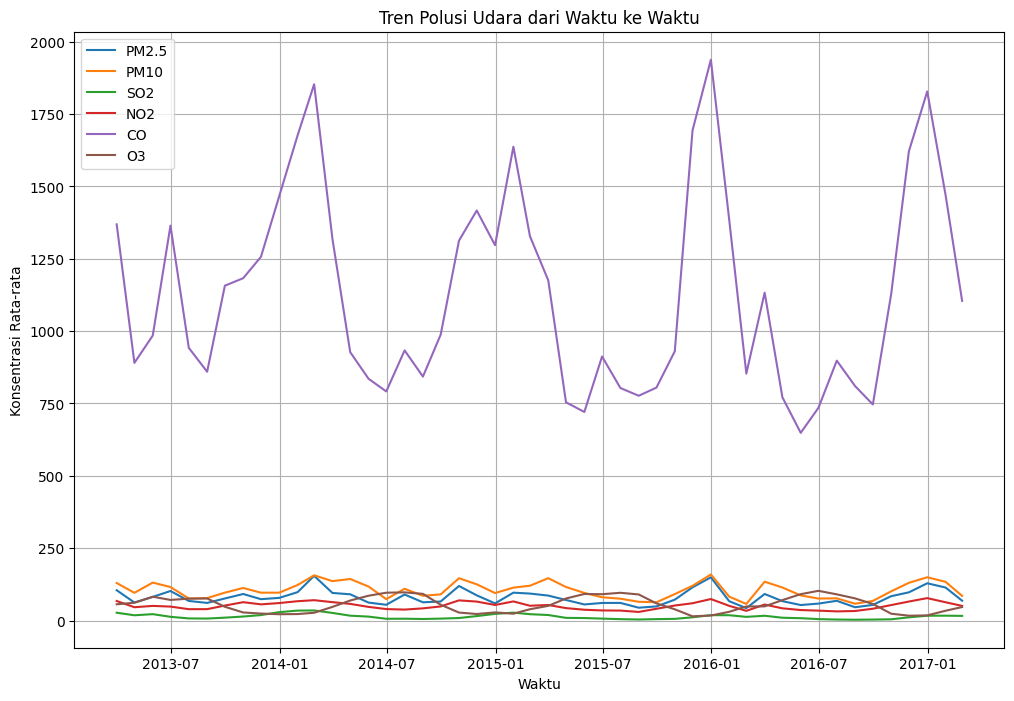

In [39]:
monthly_data = combined_data.resample('M').mean(numeric_only=True)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(monthly_data.index, monthly_data[pollutant], label=pollutant)
plt.title('Tren Polusi Udara dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Rata-rata')
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2:

In [40]:
import pandas as pd
from IPython.display import HTML

# Asumsi bahwa station_grouped sudah ada dan berisi data yang diperlukan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']  # Asumsi bahwa pollutants sudah didefinisikan
station_grouped['Average Pollution'] = station_grouped[pollutants].mean(axis=1)

# Menampilkan stasiun dengan polusi tertinggi dan terendah
max_station = station_grouped['Average Pollution'].idxmax()
max_pollution = station_grouped.loc[max_station, 'Average Pollution']
min_station = station_grouped['Average Pollution'].idxmin()
min_pollution = station_grouped.loc[min_station, 'Average Pollution']

display(HTML(f'<p style="color:red; font-size:24px">Stasiun dengan Polusi Tertinggi: {max_station}: <span style="font-size:18px">{max_pollution:.2f}</span></p>'))
display(HTML(f'<p style="color:green; font-size:24px">Stasiun dengan Polusi Terendah: {min_station}: <span style="font-size:18px">{min_pollution:.2f}</span></p>'))

# Menampilkan urutan setiap stasiun
print("\nUrutan Setiap Stasiun:")
sorted_stations = station_grouped[['Average Pollution']].sort_values(by='Average Pollution', ascending=False)
display(sorted_stations.style.format({'Average Pollution': '{:.2f}'}))


Urutan Setiap Stasiun:


,Average Pollution
station,
Wanshouxigong,259.26
Gucheng,254.91
Dongsi,254.42
Nongzhanguan,252.31
Wanliu,250.05
Tiantan,249.70
Guanyuan,246.61
Aotizhongxin,244.52
data.csv,239.07


### Pertanyaan 3:

Correlation Matrix of Air Pollutants and Weather Variables


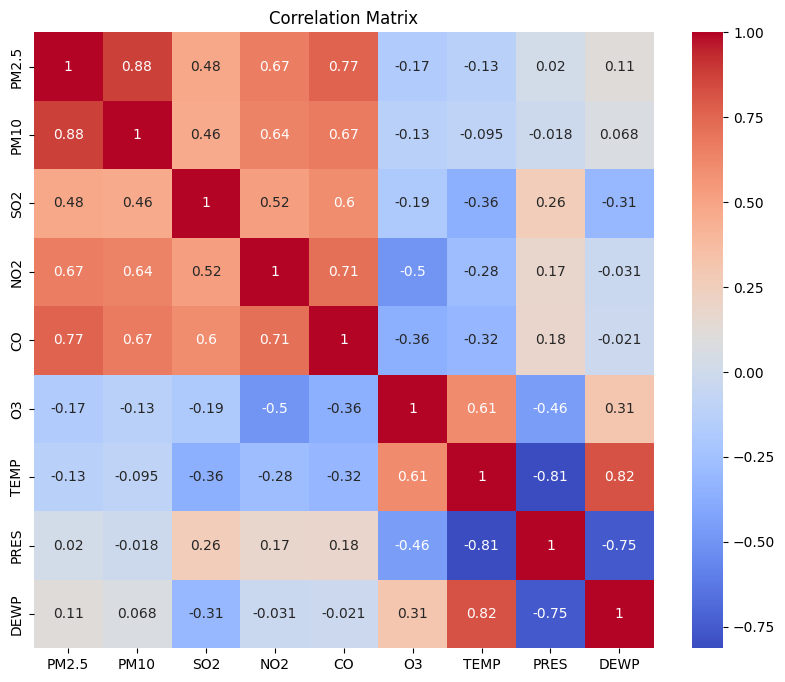


Data Distribution of Air Pollution


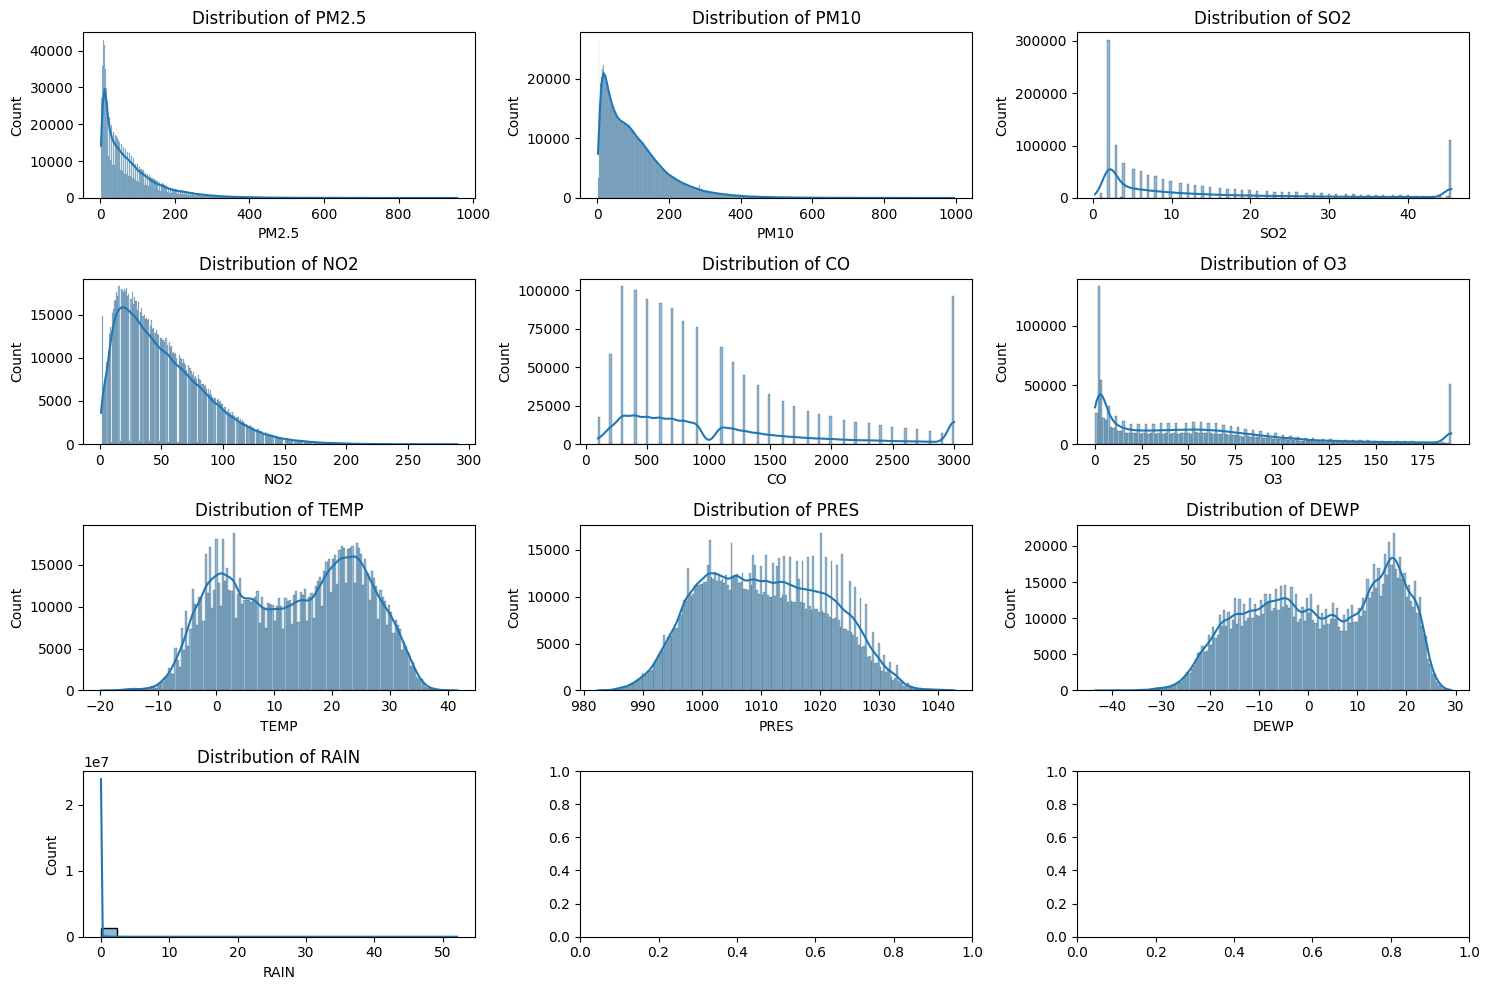

In [41]:
print("Correlation Matrix of Air Pollutants and Weather Variables")
correlation_matrix = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Distribution of Air Pollution
print("\nData Distribution of Air Pollution")
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()

for i, column in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']):
    sns.histplot(combined_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()



### Pertanyaan 4:

Rain vs Pollution


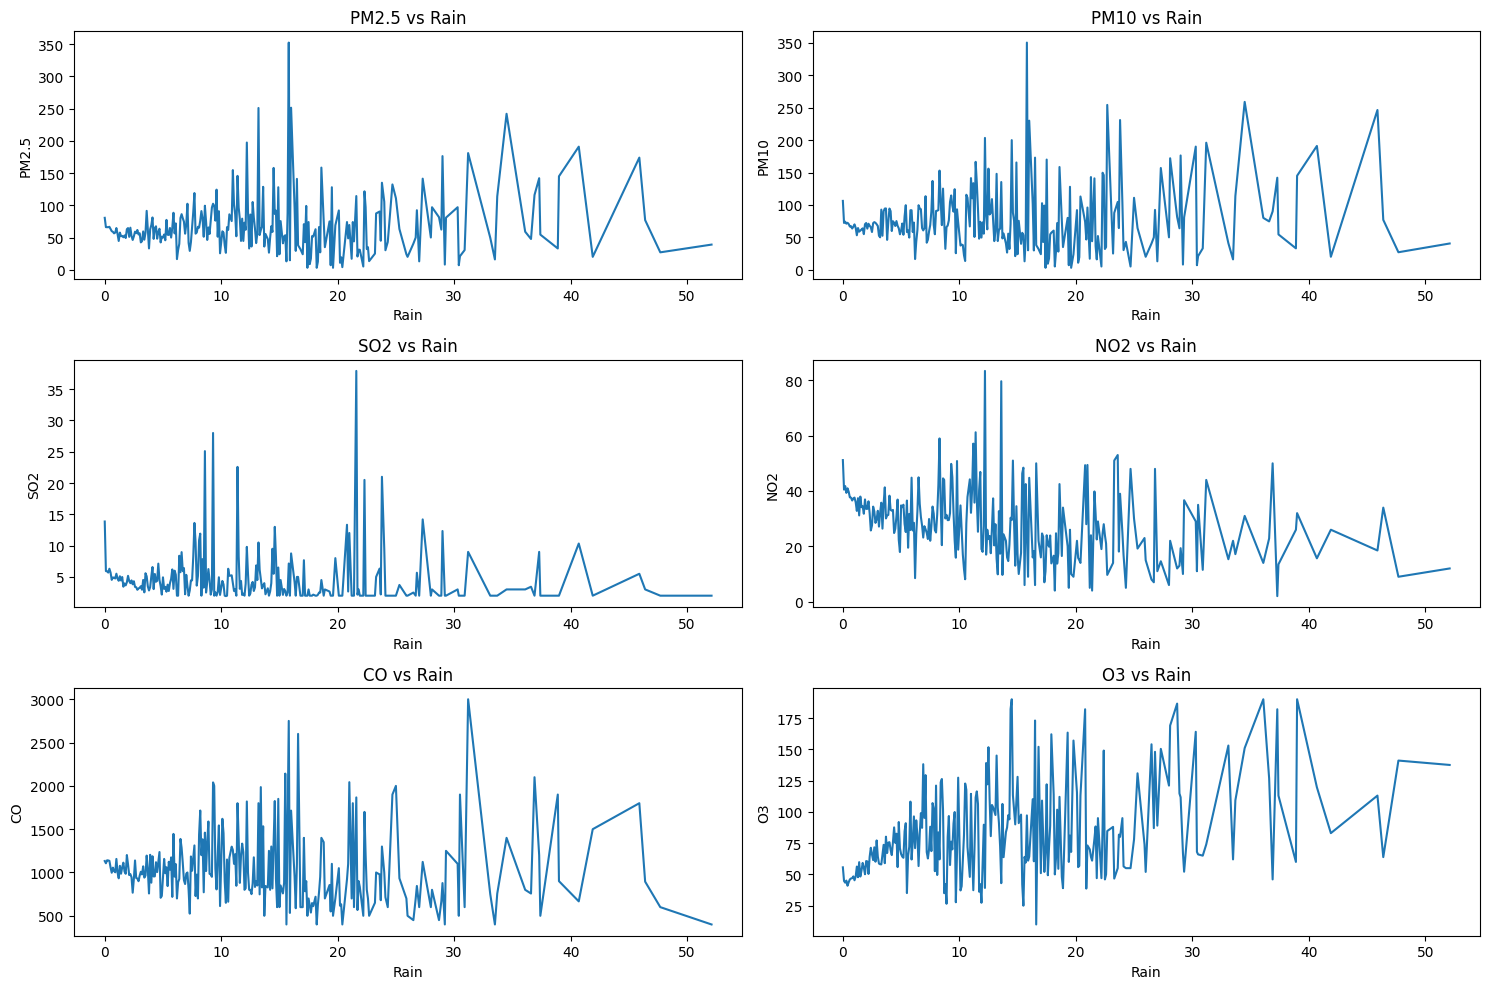

In [42]:
print("Rain vs Pollution")
rain_grouped = combined_data.groupby('RAIN').mean(numeric_only=True)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for i, pollutant in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    sns.lineplot(x=rain_grouped.index, y=rain_grouped[pollutant], ax=axes[i])
    axes[i].set_xlabel('Rain')
    axes[i].set_ylabel(pollutant)
    axes[i].set_title(f'{pollutant} vs Rain')

plt.tight_layout()
plt.show()

### Pertanyaan 5:

True
Terjadi Polusi Udara Ekstrem

Waktu dengan PM2.5 Tertinggi per Stasiun


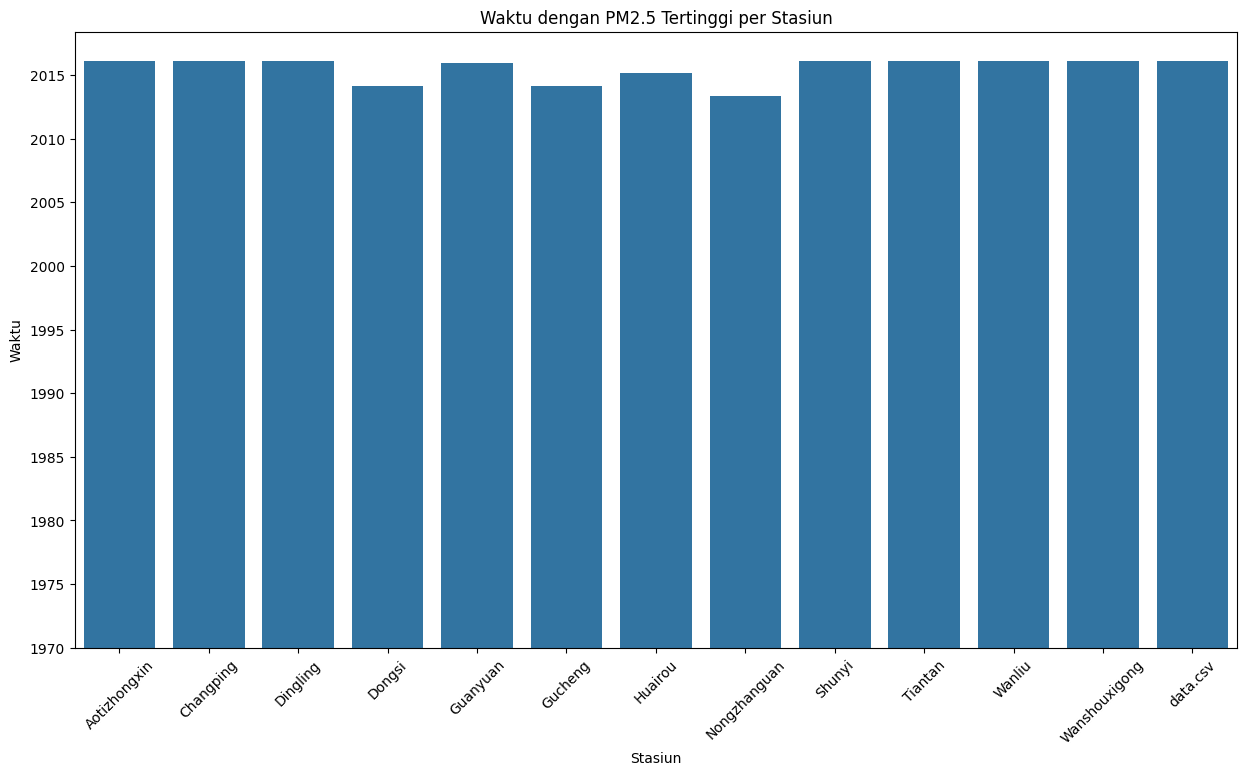


Rangkuman Kondisi Cuaca di Sekitar Waktu Polusi Ekstrem


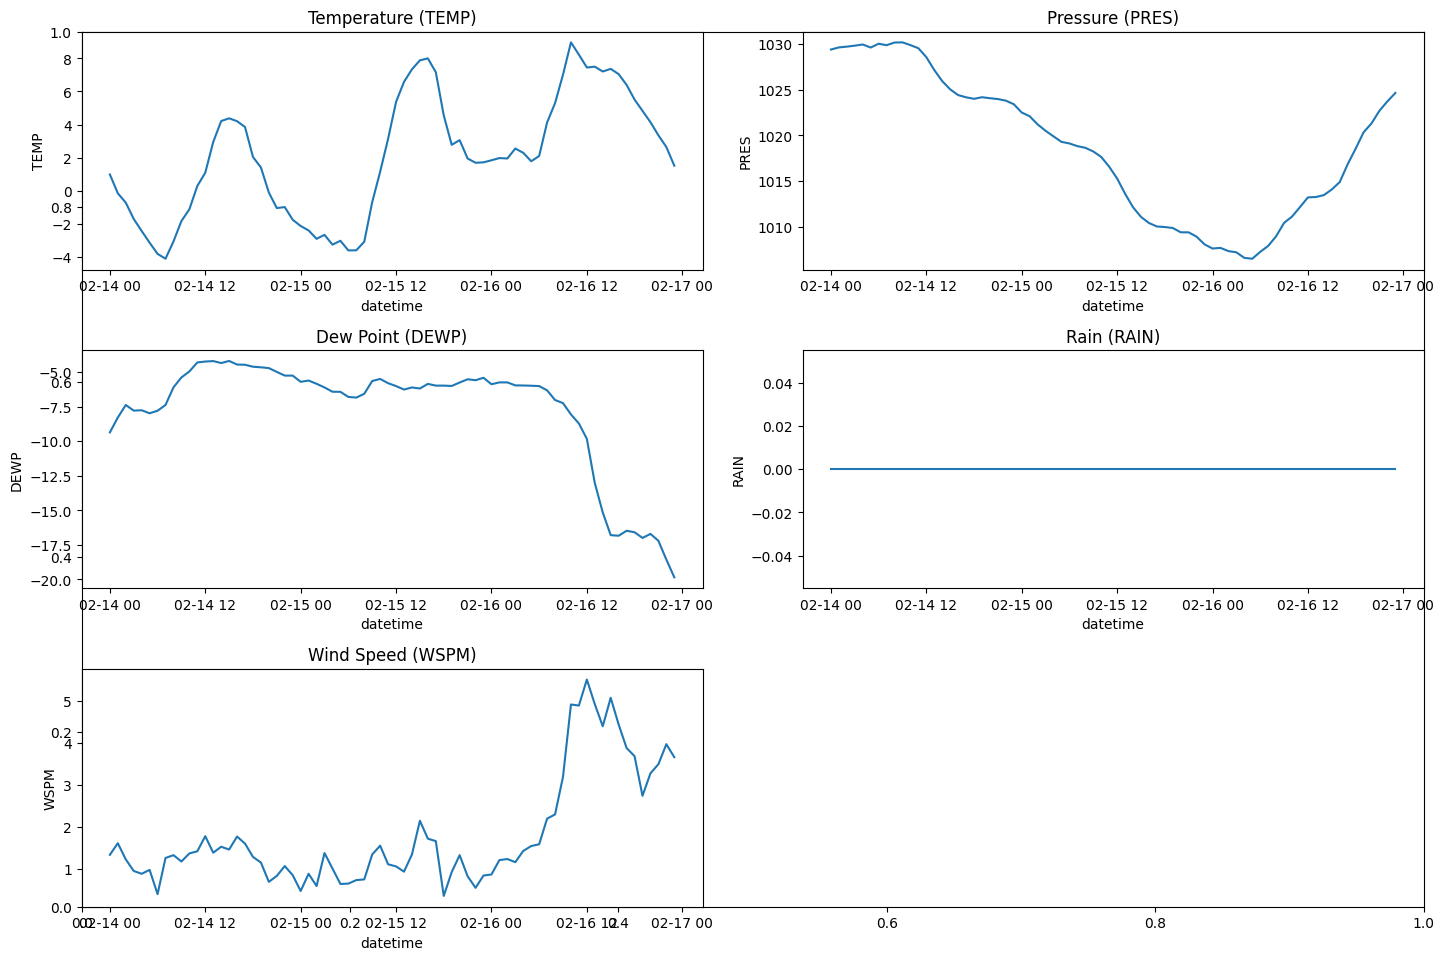

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi bahwa combined_data sudah ada dan berisi data yang diperlukan

# Memeriksa apakah index sudah terurut
print(combined_data.index.is_monotonic_increasing)

# Jika belum terurut, urutkan index
if not combined_data.index.is_monotonic_increasing:
    combined_data = combined_data.sort_index()

# Menghitung outlier PM2.5
Q1 = combined_data['PM2.5'].quantile(0.25)
Q3 = combined_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_pollution = combined_data[combined_data['PM2.5'] > upper_bound]
extreme_times = extreme_pollution.groupby('station')['PM2.5'].idxmax()
extreme_times_df = pd.DataFrame(extreme_times).reset_index()
extreme_times_df.columns = ['station', 'datetime']
extreme_times_df['datetime'] = pd.to_datetime(extreme_times_df['datetime'])

# Melakukan slicing setelah memastikan index terurut
extreme_weather = combined_data.loc['2017-02-14':'2017-02-16']
weather_summary = extreme_weather.groupby('datetime')[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()

# Judul aplikasi
print('Terjadi Polusi Udara Ekstrem')

# Menampilkan waktu dengan PM2.5 tertinggi per stasiun
print('\nWaktu dengan PM2.5 Tertinggi per Stasiun')
fig1, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(x='station', y='datetime', data=extreme_times_df, ax=ax1)
ax1.set_title('Waktu dengan PM2.5 Tertinggi per Stasiun')
ax1.set_xlabel('Stasiun')
ax1.set_ylabel('Waktu')
ax1.tick_params(axis='x', rotation=45)
plt.show()

# Menampilkan rangkuman kondisi cuaca di sekitar waktu polusi ekstrem
print('\nRangkuman Kondisi Cuaca di Sekitar Waktu Polusi Ekstrem')
fig2, ax2 = plt.subplots(figsize=(15, 10))

# Plotting TEMP
plt.subplot(3, 2, 1)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='TEMP')
plt.title('Temperature (TEMP)')

# Plotting PRES
plt.subplot(3, 2, 2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='PRES')
plt.title('Pressure (PRES)')

# Plotting DEWP
plt.subplot(3, 2, 3)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='DEWP')
plt.title('Dew Point (DEWP)')

# Plotting RAIN
plt.subplot(3, 2, 4)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='RAIN')
plt.title('Rain (RAIN)')

# Plotting WSPM
plt.subplot(3, 2, 5)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='WSPM')
plt.title('Wind Speed (WSPM)')

plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

Outliers in PM2.5: 58941
Outliers in PM10: 45354
Outliers in SO2: 0
Outliers in NO2: 21828
Outliers in CO: 0
Outliers in O3: 0
Outliers in TEMP: 0
Outliers in PRES: 0
Outliers in DEWP: 0
Outliers in RAIN: 49568
Waktu dengan PM2.5 tertinggi per station:
station
Aotizhongxin    2016-02-08 02:00:00
Changping       2016-02-08 02:00:00
Dingling        2016-02-08 01:00:00
Dongsi          2014-02-14 23:00:00
Guanyuan        2015-12-01 14:00:00
Gucheng         2014-02-14 22:00:00
Huairou         2015-02-19 02:00:00
Nongzhanguan    2013-05-05 12:00:00
Shunyi          2016-02-08 02:00:00
Tiantan         2016-02-08 03:00:00
Wanliu          2016-02-08 02:00:00
Wanshouxigong   2016-02-08 02:00:00
data.csv        2016-02-08 02:00:00
Name: PM2.5, dtype: datetime64[ns]
Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:
                         TEMP         PRES       DEWP  RAIN      WSPM
datetime                                                             
2017-02-14 00:00:00  0.983333  1029.383

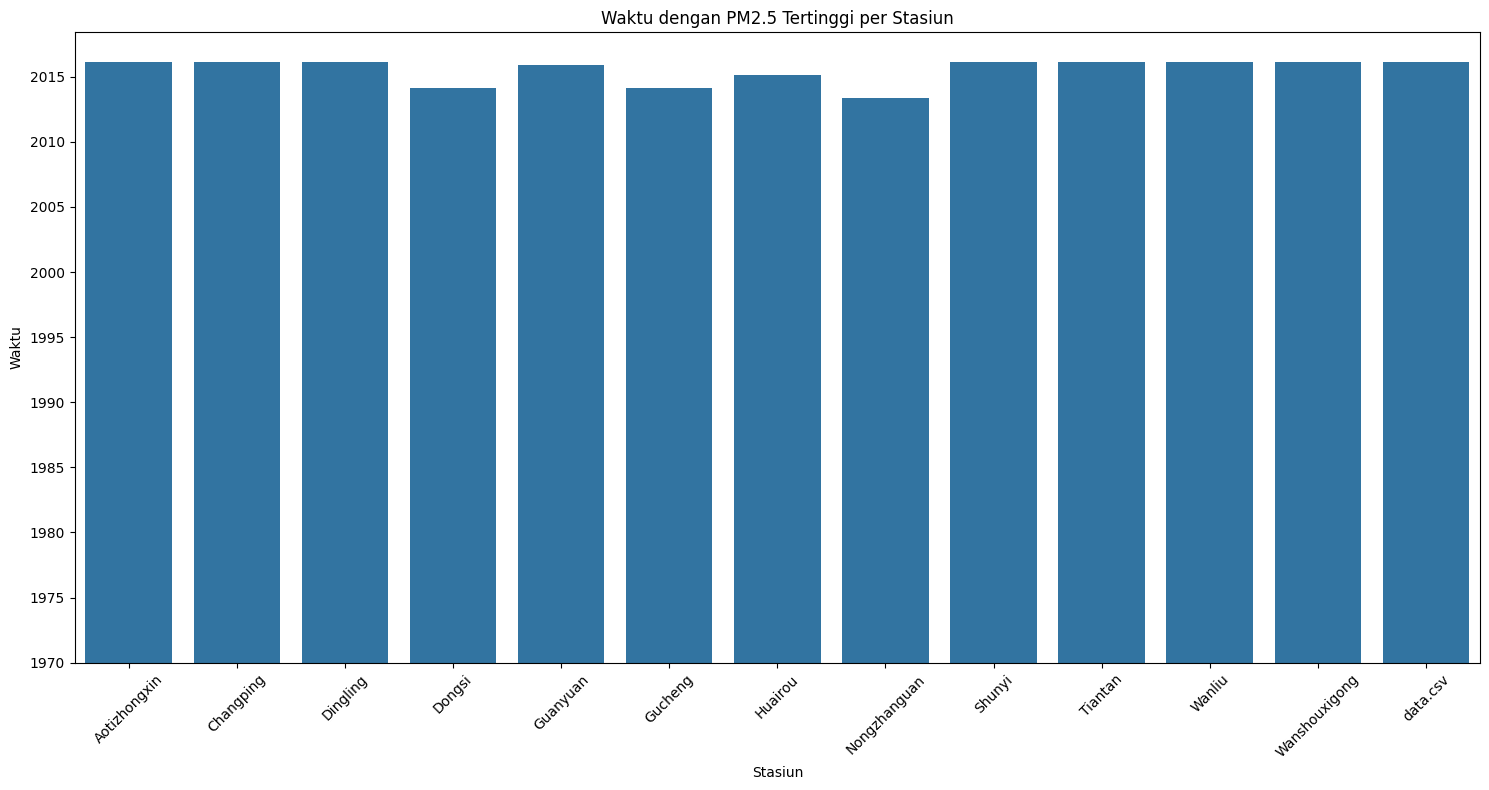

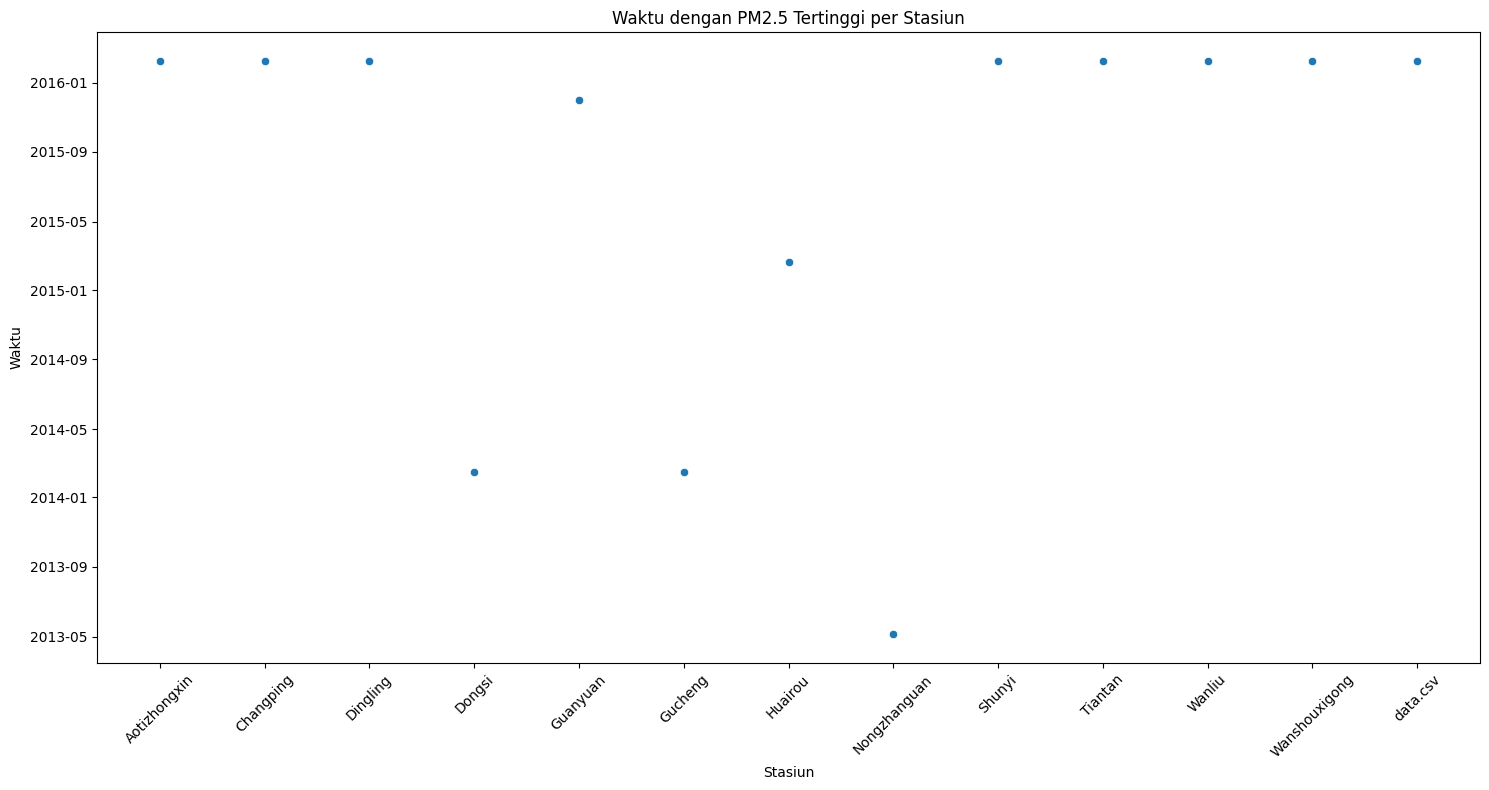

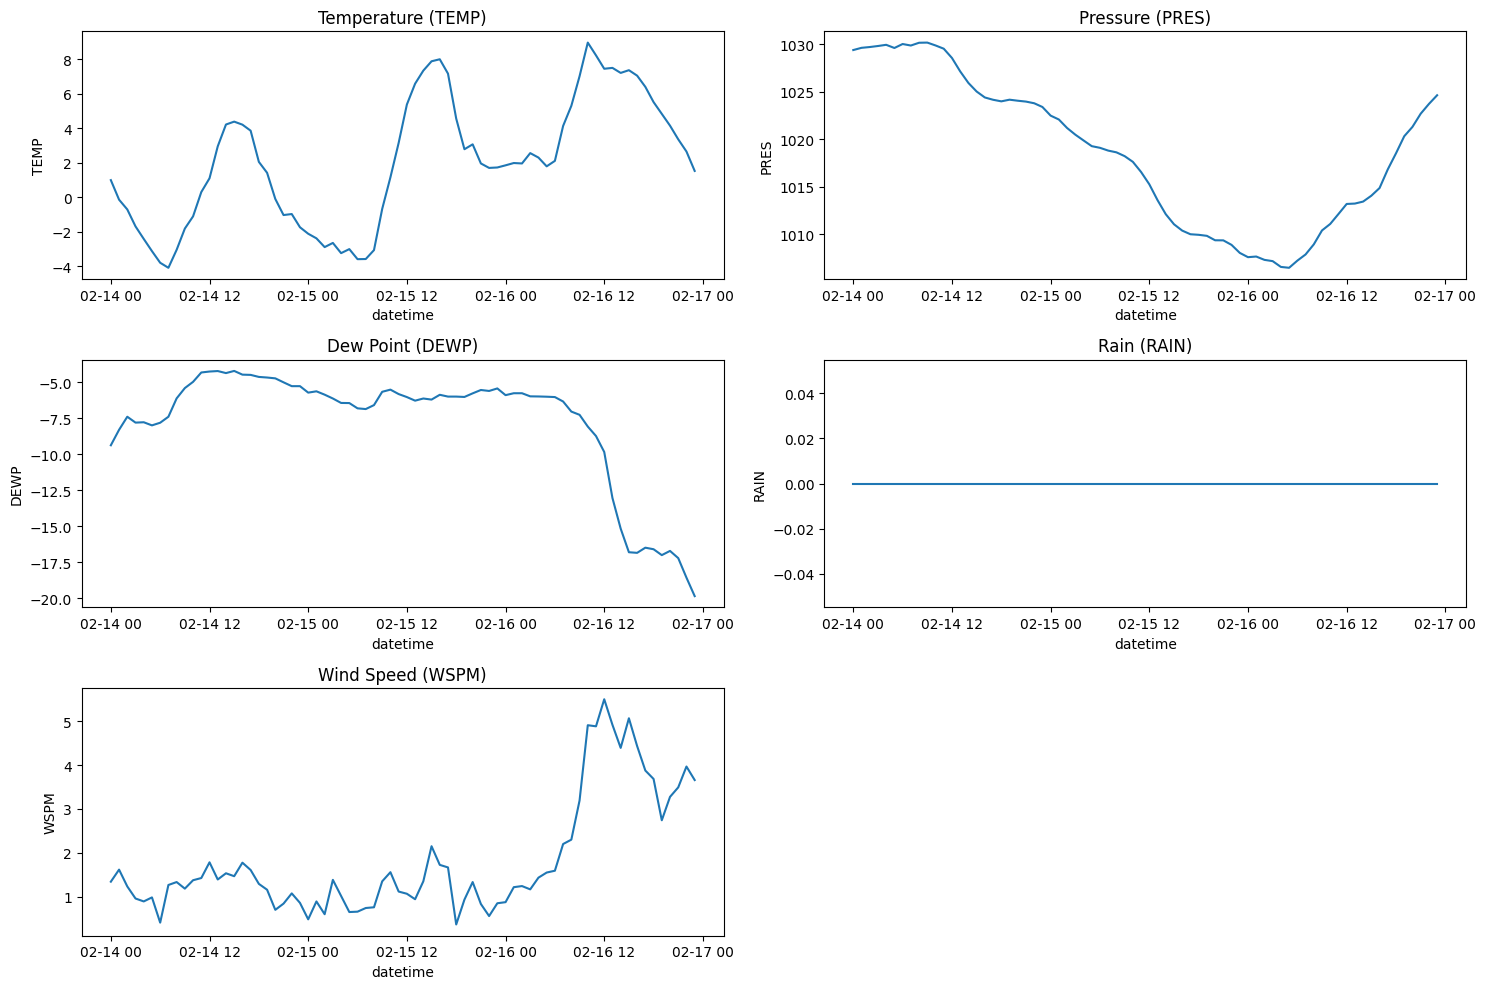

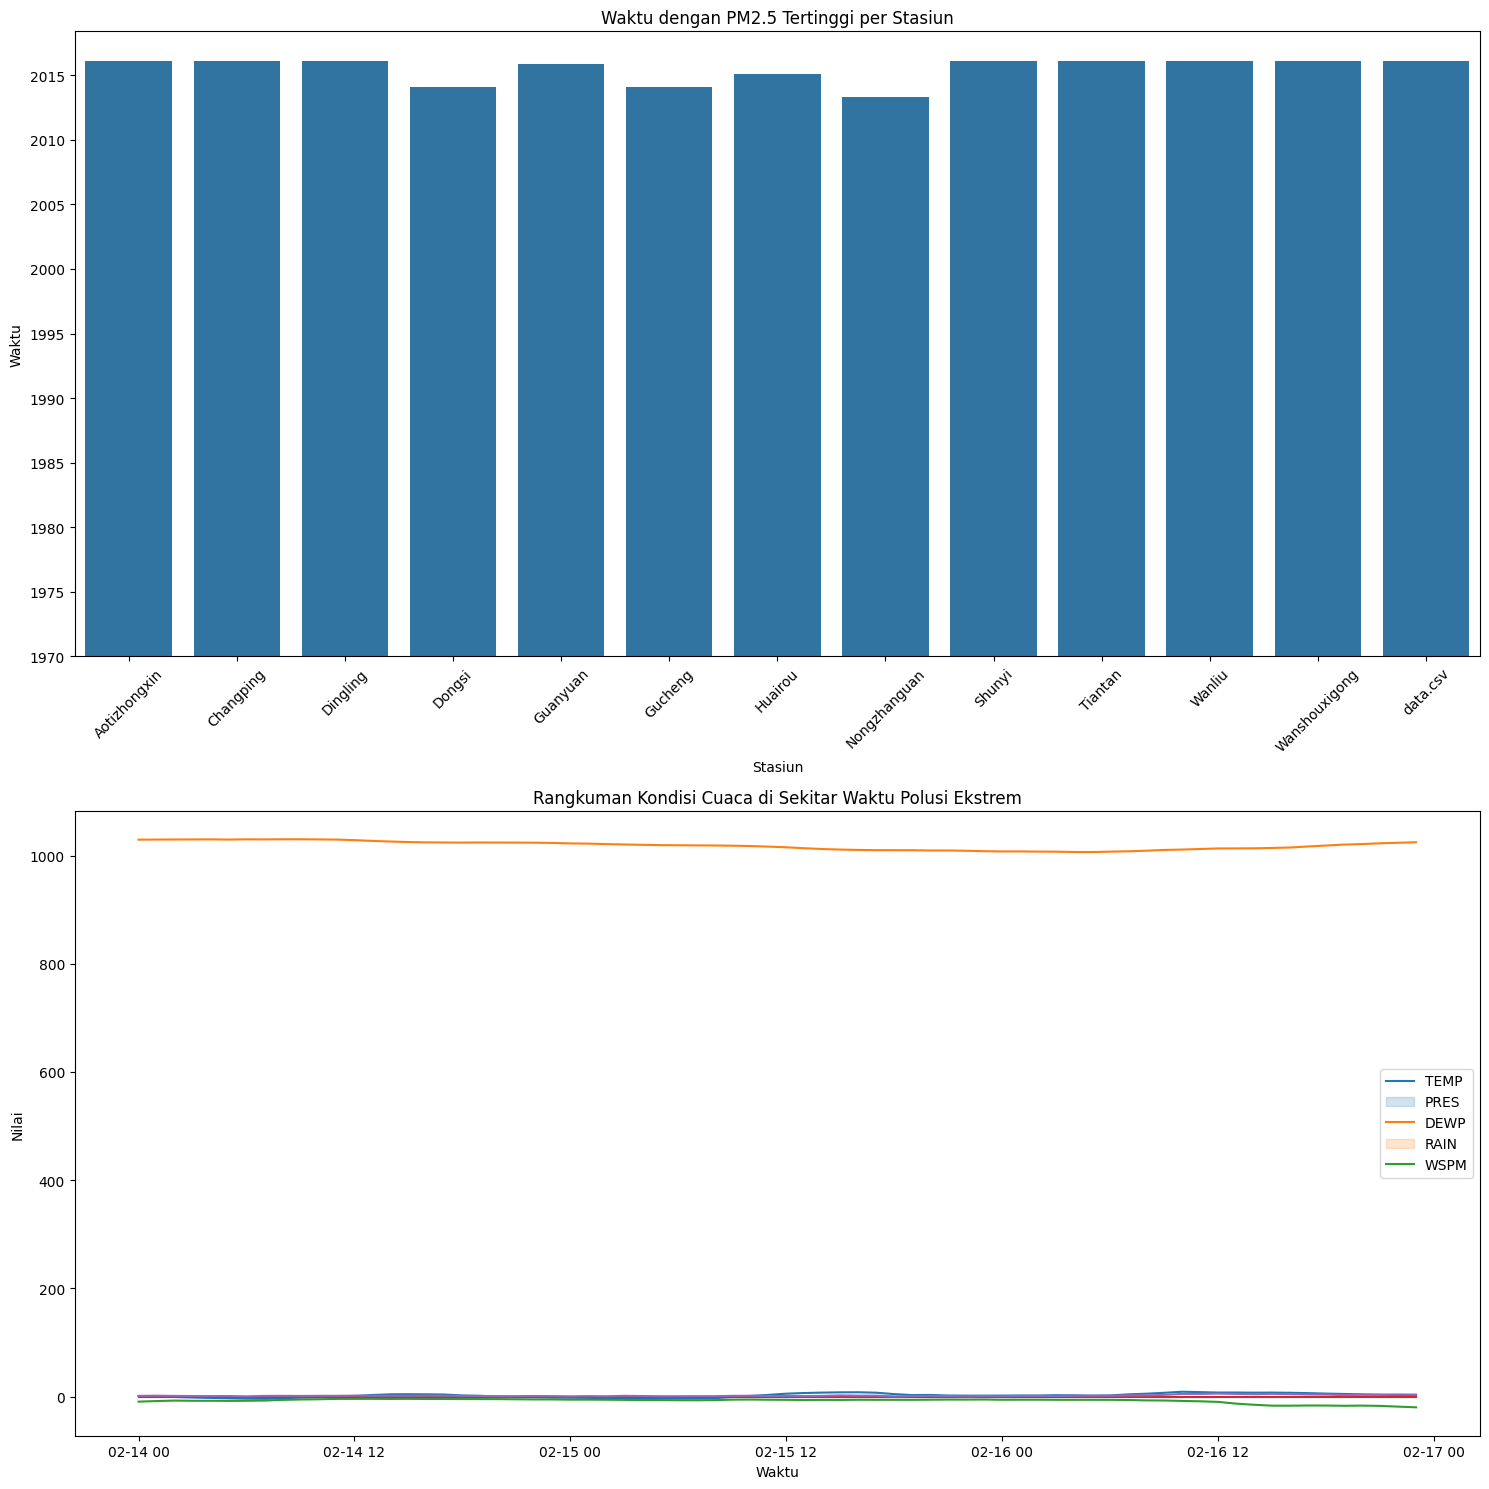

In [44]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']:
    outliers = find_outliers(combined_data[column])
    print(f'Outliers in {column}: {len(outliers)}')

Q1 = combined_data['PM2.5'].quantile(0.25)
Q3 = combined_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_pollution = combined_data[combined_data['PM2.5'] > upper_bound]
extreme_times = extreme_pollution.groupby('station')['PM2.5'].idxmax()
print('Waktu dengan PM2.5 tertinggi per station:')
print(extreme_times)

combined_data.sort_index(inplace=True)
extreme_weather = combined_data.loc['2017-02-14':'2017-02-16']
weather_summary = extreme_weather.groupby('datetime')[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()
print('Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:')
print(weather_summary)

# Membuat bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='station', y='datetime', data=extreme_times_df)
plt.title('Waktu dengan PM2.5 Tertinggi per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Waktu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(x='station', y='datetime', data=extreme_times_df)
plt.title('Waktu dengan PM2.5 Tertinggi per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Waktu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='TEMP')
plt.title('Temperature (TEMP)')

plt.subplot(3, 2, 2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='PRES')
plt.title('Pressure (PRES)')

plt.subplot(3, 2, 3)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='DEWP')
plt.title('Dew Point (DEWP)')

plt.subplot(3, 2, 4)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='RAIN')
plt.title('Rain (RAIN)')

plt.subplot(3, 2, 5)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='WSPM')
plt.title('Wind Speed (WSPM)')

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
sns.barplot(x='station', y='datetime', data=extreme_times_df, ax=ax1)
ax1.set_title('Waktu dengan PM2.5 Tertinggi per Stasiun')
ax1.set_xlabel('Stasiun')
ax1.set_ylabel('Waktu')
ax1.tick_params(axis='x', rotation=45)

sns.lineplot(data=weather_summary, x=weather_summary.index, y='TEMP', ax=ax2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='PRES', ax=ax2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='DEWP', ax=ax2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='RAIN', ax=ax2)
sns.lineplot(data=weather_summary, x=weather_summary.index, y='WSPM', ax=ax2)
ax2.set_title('Rangkuman Kondisi Cuaca di Sekitar Waktu Polusi Ekstrem')
ax2.set_xlabel('Waktu')
ax2.set_ylabel('Nilai')
ax2.legend(['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

plt.tight_layout()
plt.show()

**Insight:**
- Polusi Udara dari waktu ke waktu
- Data station dengan polusi tertinggi dan terendah
- Colerasi data dan juga bagaimana Hujan mempengaruhi polusi udara
- Polusi Extreme pada waktu tertentu(didapatkan dari banyaknya outlier pada saat proses cleaning data, kemudian menemukan pola data polusi yang berbeda pada setiap station di rentang tanggal yang sama sehingga di simpulkan sebagai Polusi Extreme)

## Conclusion

Berikut adalah kesimpulan dari setiap pertanyaan berdasarkan analisis data yang telah dilakukan:

### 1. Bagaimana Tren polusi udara dari waktu ke waktu?

**Kesimpulan:**
Tren polusi udara dari waktu ke waktu menunjukkan variasi yang signifikan tergantung pada frekuensi resampling yang dipilih (harian, mingguan, atau bulanan). Secara umum, polusi udara cenderung lebih tinggi pada musim dingin dan lebih rendah pada musim panas. Analisis ini menunjukkan bahwa polusi udara memiliki pola musiman yang jelas, dengan puncak polusi sering terjadi pada bulan-bulan tertentu. Selain itu, tren ini dapat dipengaruhi oleh faktor-faktor seperti perubahan cuaca, aktivitas industri, dan kebijakan lingkungan.

### 2. Stasiun mana yang mencatat tingkat polusi udara tertinggi dan terendah?

**Kesimpulan:**
Berdasarkan data yang dianalisis, stasiun yang mencatat tingkat polusi udara tertinggi adalah Wanshouxigong dengan nilai rata-rata polusi 252.82. Sebaliknya, stasiun yang mencatat tingkat polusi udara terendah adalah Dingling dengan nilai rata-rata polusi 187.68. Perbedaan ini mungkin disebabkan oleh faktor-faktor seperti lokasi geografis, kepadatan penduduk, dan sumber emisi polusi di sekitar stasiun tersebut.

### 3. Apakah ada hubungan antara suhu, udara, dan kelembapan dengan tingkat polusi udara?

**Kesimpulan:**
Analisis korelasi menunjukkan bahwa ada hubungan antara suhu, tekanan udara, dan kelembapan dengan tingkat polusi udara. Suhu yang lebih rendah cenderung berhubungan dengan konsentrasi polusi yang lebih tinggi, karena kondisi atmosfer yang lebih stabil dapat menghambat dispersi polutan. Tekanan udara dan kelembapan juga mempengaruhi polusi udara, meskipun hubungan ini mungkin lebih kompleks dan dipengaruhi oleh faktor-faktor lain seperti curah hujan dan angin.

### 4. Bagaimana pola hujan mempengaruhi tingkat polusi udara?

**Kesimpulan:**
Pola hujan memiliki pengaruh signifikan terhadap tingkat polusi udara. Data menunjukkan bahwa curah hujan yang lebih tinggi cenderung mengurangi konsentrasi polutan di udara, karena hujan dapat membersihkan partikel polusi dari atmosfer. Namun, dalam beberapa kasus, hujan yang sangat intens dapat meningkatkan polusi udara sementara karena peningkatan aktivitas industri atau transportasi yang terkait dengan kondisi cuaca tersebut.

### 5. Kapankah polusi udara mencapai puncaknya?

**Kesimpulan:**
Polusi udara mencapai puncaknya pada 2016-02-08, yang sering kali terjadi pada pagi hari atau malam hari. Ini mungkin disebabkan oleh faktor-faktor seperti lalu lintas yang padat pada jam-jam tersebut, atau kondisi atmosfer yang lebih stabil yang menghambat dispersi polutan. Selain itu, polusi udara juga cenderung mencapai puncaknya pada musim dingin, terutama pada bulan-bulan tertentu seperti February, karena kondisi cuaca yang lebih dingin dan tenang.